# Activations

In [3]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

In [5]:
x = torch.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy()

In [15]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

In [16]:
%matplotlib inline

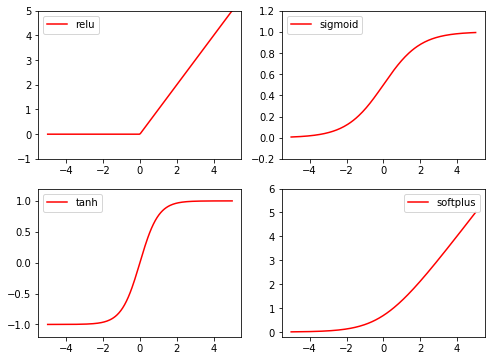

In [17]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8,6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

# Regression

In [129]:
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

In [130]:
x, y = Variable(x), Variable(y)

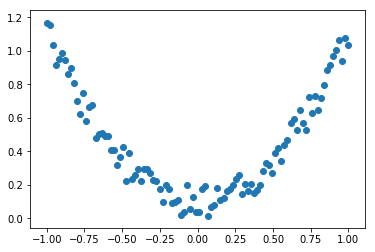

In [131]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [139]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output) # output layer
        
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.predict(x)
        return x

In [162]:
net = Net(n_feature=1, n_hidden=20, n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=20)
  (predict): Linear(in_features=20, out_features=1)
)


In [163]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()


In [164]:
plt.ion()

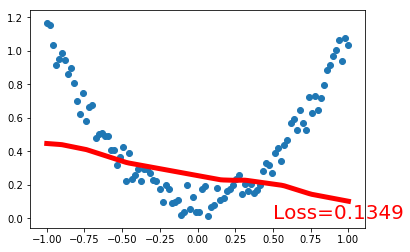

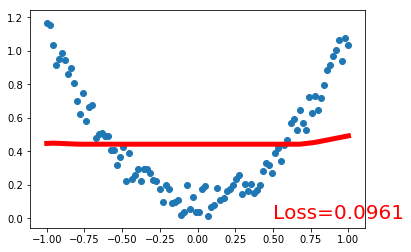

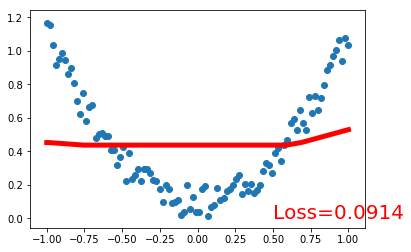

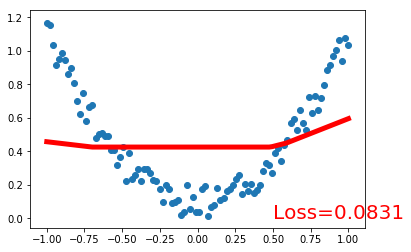

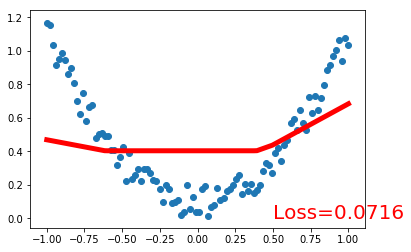

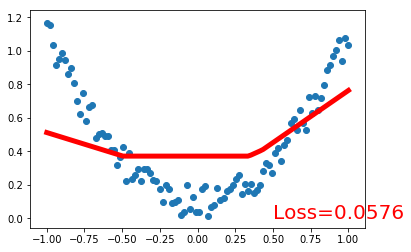

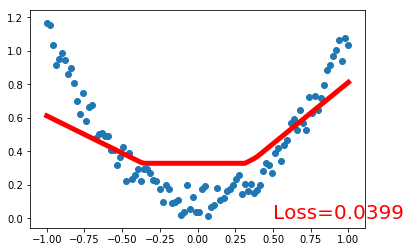

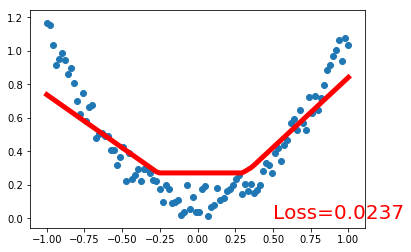

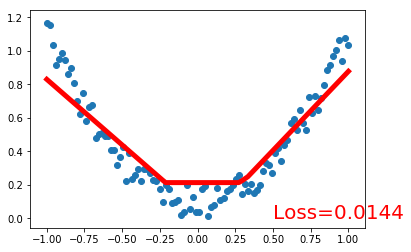

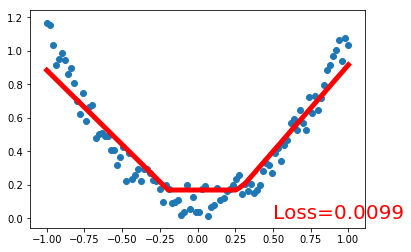

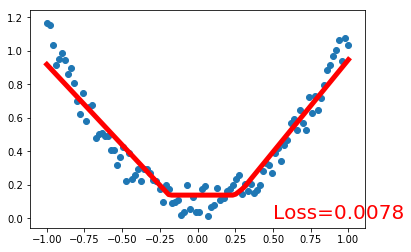

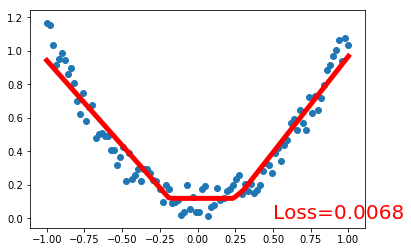

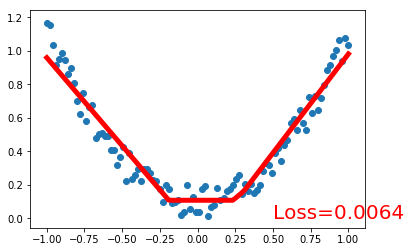

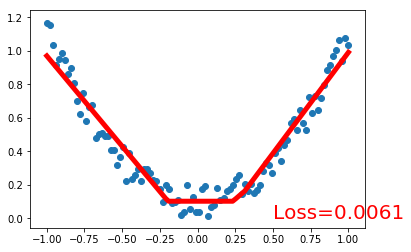

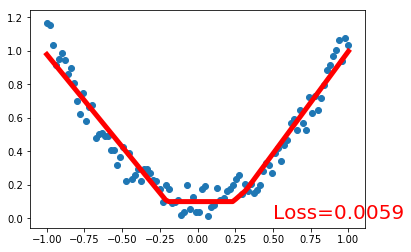

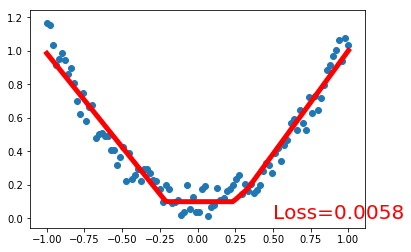

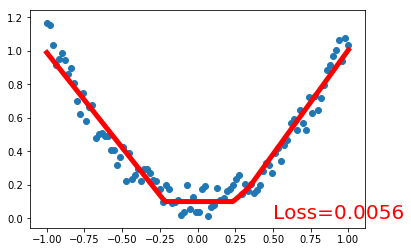

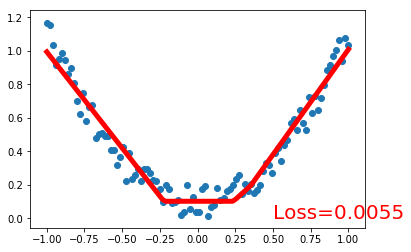

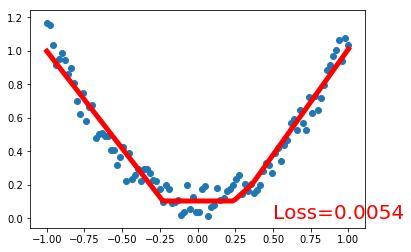

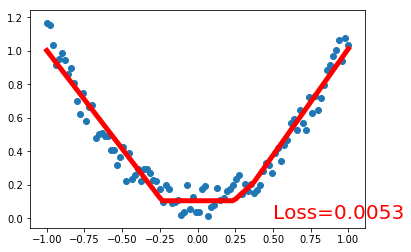

In [165]:
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)
    
    plt.ioff()
    plt.show()

# Classification

In [167]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

In [171]:
x, y = Variable(x), Variable(y)

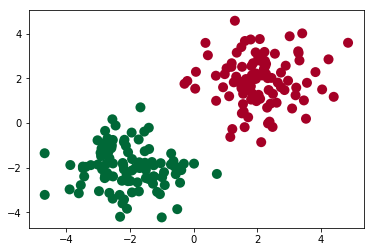

In [173]:
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')

In [174]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [183]:
net = Net(n_feature=2, n_hidden=2, n_output=2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=2)
  (out): Linear(in_features=2, out_features=2)
)


In [184]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

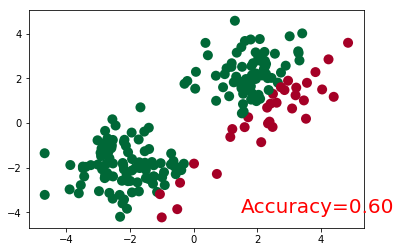

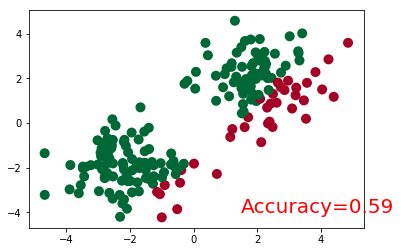

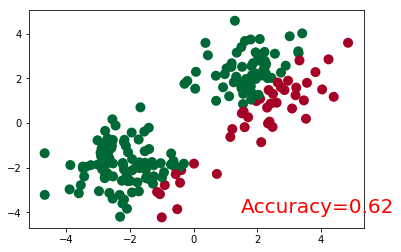

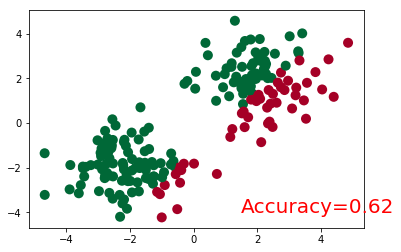

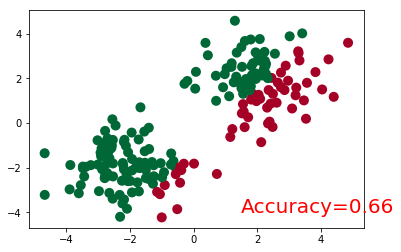

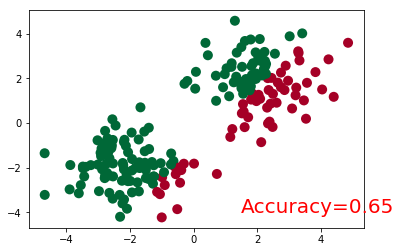

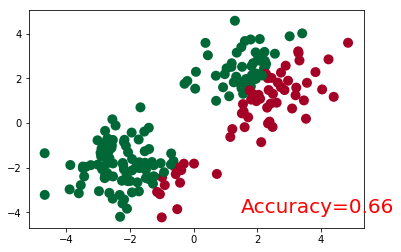

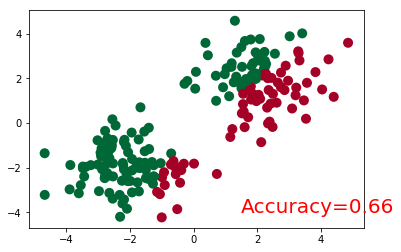

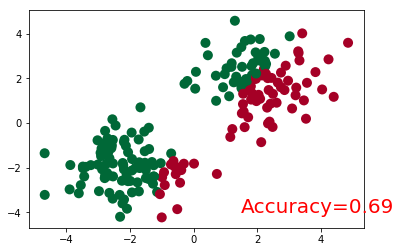

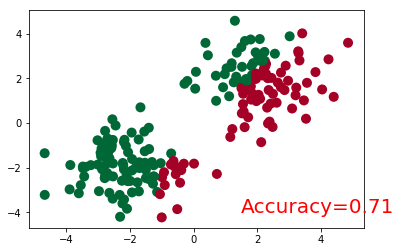

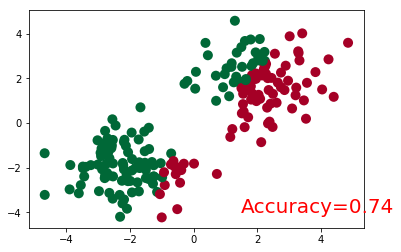

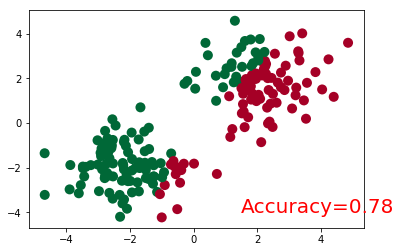

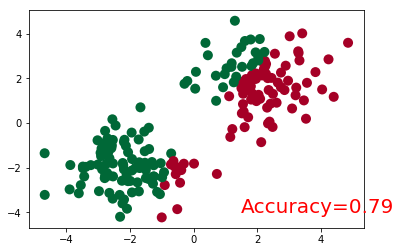

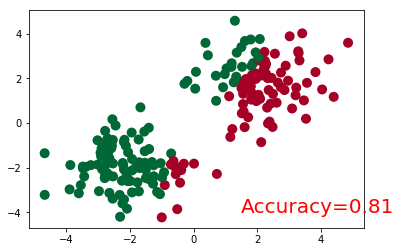

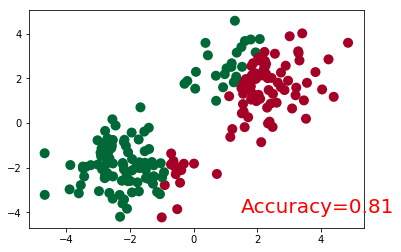

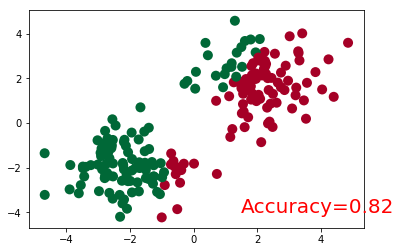

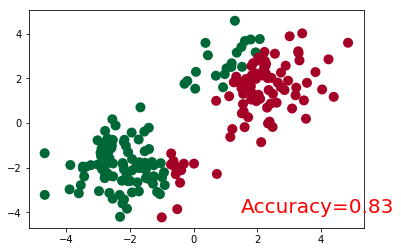

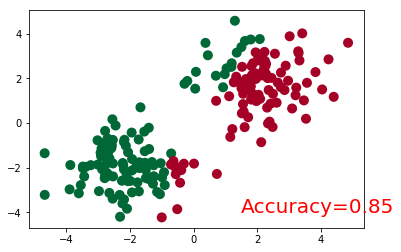

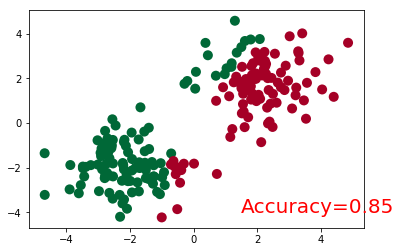

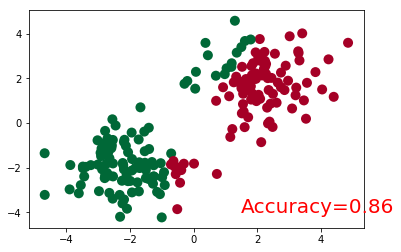

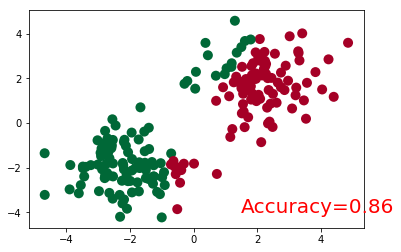

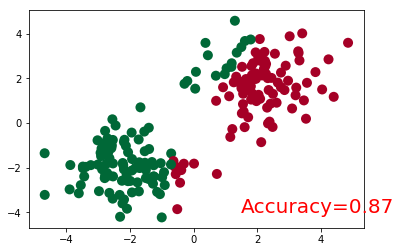

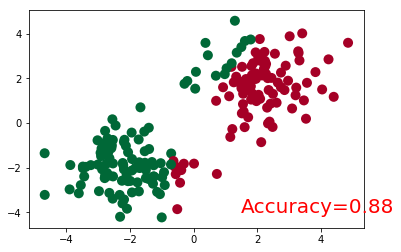

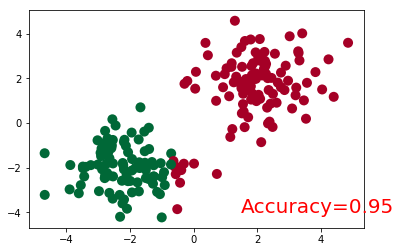

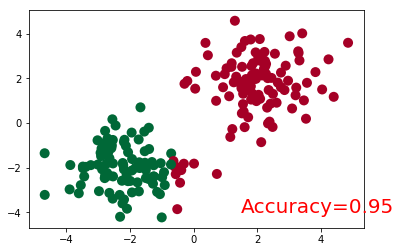

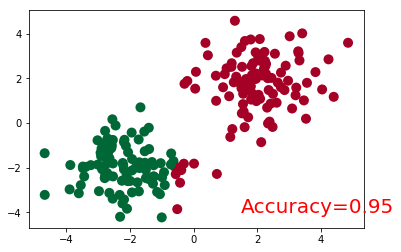

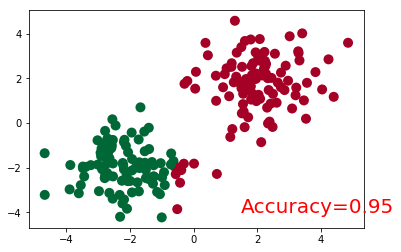

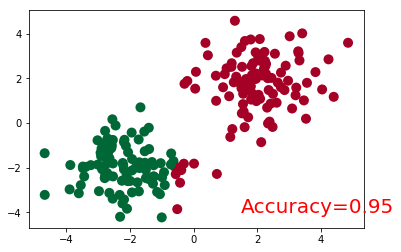

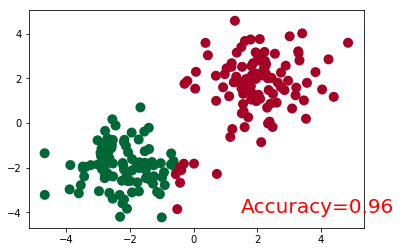

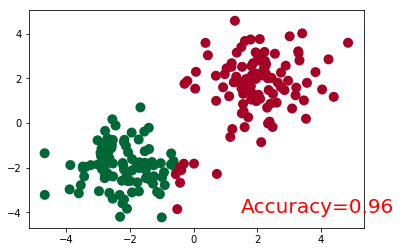

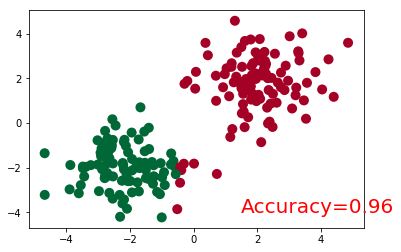

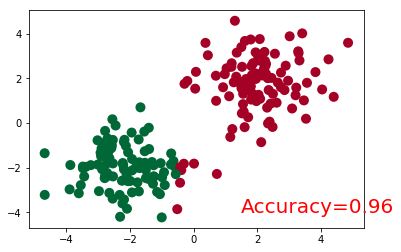

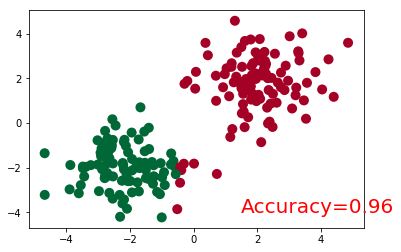

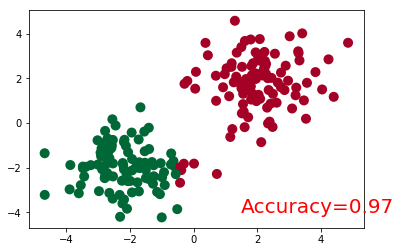

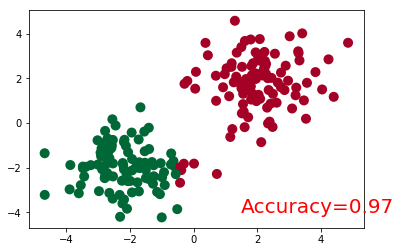

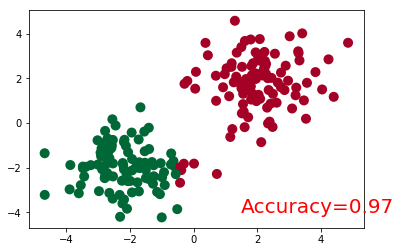

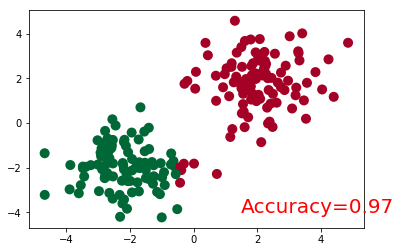

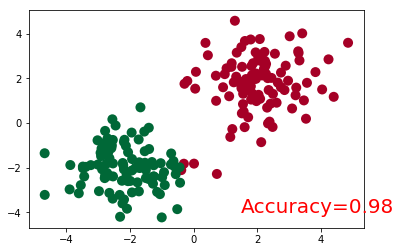

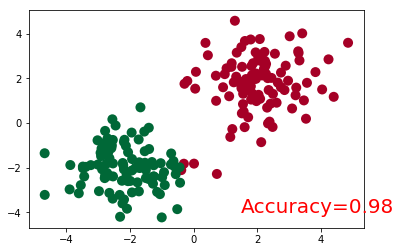

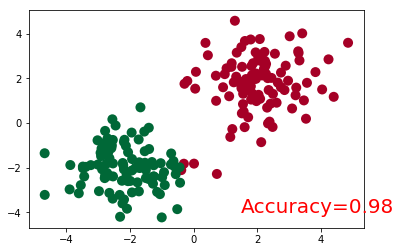

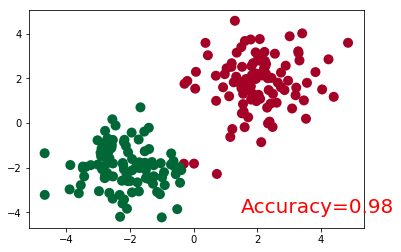

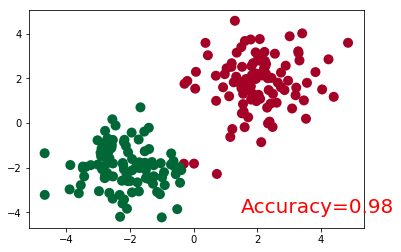

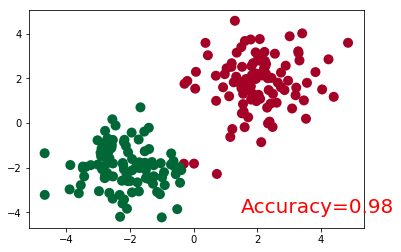

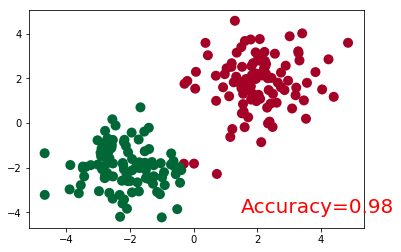

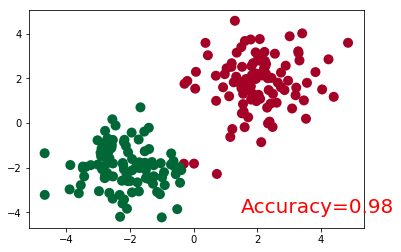

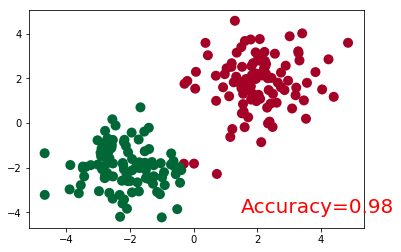

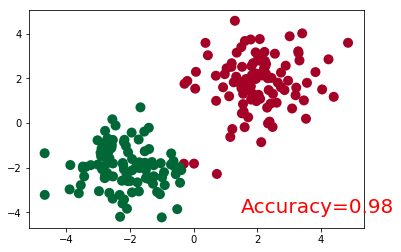

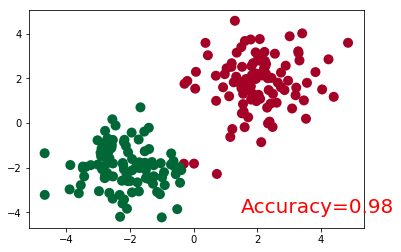

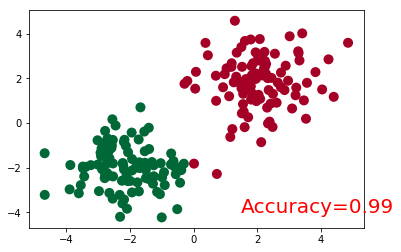

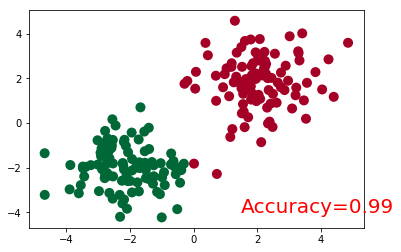

In [185]:
for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y, s=100, lw=0, cmap="RdYlGn")
        accuracy = sum(pred_y == target_y) / 200
        plt.text(1.5, -4, 'Accuracy=%.2f'%accuracy, fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)
        
    plt.ioff()
    plt.show()

# Batch Training

In [186]:
import torch.utils.data as Data

In [187]:
torch.manual_seed(1)  # reproducible

In [188]:
BATCH_SIZE = 5

In [189]:
x = torch.linspace(1, 10, 10)
y = torch.linspace(10, 1, 10)

In [190]:
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
)

In [193]:
for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        print(step, batch_x.numpy(), batch_y.numpy())

0 [ 3. 10.  9.  4.  7.] [8. 1. 2. 7. 4.]
1 [8. 2. 1. 5. 6.] [ 3.  9. 10.  6.  5.]
0 [4. 8. 3. 2. 1.] [ 7.  3.  8.  9. 10.]
1 [10.  5.  6.  7.  9.] [1. 6. 5. 4. 2.]
0 [ 6.  2.  4. 10.  9.] [5. 9. 7. 1. 2.]
1 [3. 8. 5. 7. 1.] [ 8.  3.  6.  4. 10.]


# Optimizers

In [194]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [195]:
x = torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

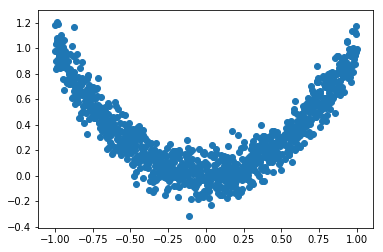

In [198]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [199]:
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [200]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [204]:
# different nets
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [206]:
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [207]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]

In [208]:
for epoch in range(EPOCH):
    print('Epoch:', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data[0])

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


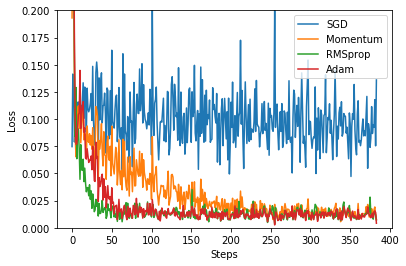

In [216]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()